In [1]:
import numpy as np
import matplotlib.pyplot as plt

### FitzHugh-Nagumo model
Instead of the HH model equations, we now consider the following equations

$\frac{dV}{dt} = V - \frac{V^3}{3} - W + I$

$\frac{dW}{dt} = \frac{(V + a - bW)}{\tau}$

In [2]:
class FHNNeuron:
    def __init__(self, a, b, tau, V0, W0):
        # Set the parameters of the FHN neuron
        self.a = a       # Recovery variable time scale
        self.b = b       # Recovery variable feedback strength
        self.tau = tau   # Membrane potential time scale
        
        # Set the initial state of the FHN neuron
        self.V = V0                   # Initial membrane potential
        self.W = W0                   # Initial recovery variable
        self.t_last_spike = -np.inf   # Last spike time (initialised to a large negative value)
        self.n_spikes = 0             # Number of spikes (initialised to 0)
        
    def update(self, dt, I):
        # Update the membrane potential and recovery variable using the FHN equations
        dV = (self.V - self.V**3 / 3 - self.W + I) * dt
        self.V += dV
        dW = (self.V + self.a - self.b*self.W)/self.tau * dt
        self.W += dW

In [124]:
# Create an instance of the FHNNeuron class
neuron = FHNNeuron(a=0.7, b=0.8, tau=12.5, V0=0.1, W0=0.0)

# Set the time step and the time range
dt = 0.01
t = np.arange(0, 100, dt)

# Initialize an empty list to store the membrane potentials
V = []
W = []

# Iterate over the time range
for i in range(len(t)):
    I = 0.5               # Constant current input
    neuron.update(dt, I)  # Update state of the neuron
    V.append(neuron.V)    # Append the membrane potential to the list
    W.append(neuron.W)    # Append the membrane potential to the list

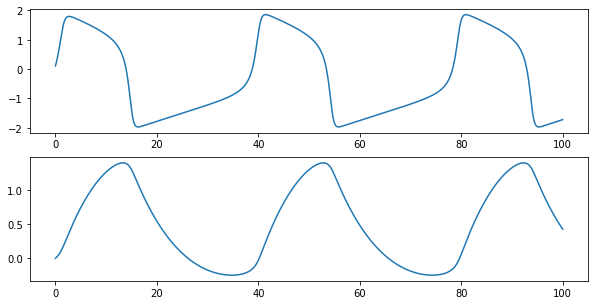

In [125]:
# Plot memebrane potential over time
fig,(ax1,ax2) = plt.subplots(2,1, figsize=(10,5))
ax1.plot(t,V)
ax2.plot(t,W)
plt.show()

In [126]:
### Plot the phase diagram with the null clines where dV/dt = 0 and dW/dt = 0
V_cube_term = [pow(i, 3)/3 for i in V]

null_cline_0 = [vi - vcubei + I for vi,vcubei in zip(V,V_cube_term)]
null_cline_1 = [(vi+0.7)/0.8 for vi in V]

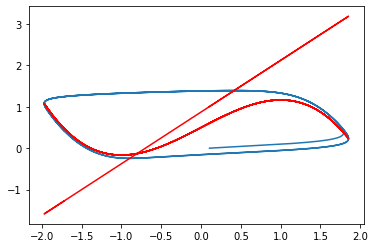

In [127]:
plt.plot(V,W)
plt.plot(V, null_cline_0, c='red')
plt.plot(V, null_cline_1, c='red')
# plt.ylim(-2,2)

By varying $I$, we see that the above phase diagram settles on a stable point for low and high values of $I$, but continues in a limit cycle for intermediate values. Let us now plot the relationship between $V$ and $I$ to see what exactly happens here. We will overlay this with the analytical calculations of where the two null clines intersect to infer stability of these fixed points.

In [128]:
# Set the time step and the time range
dt = 0.01
t = np.arange(0, 100, dt)

# Initialize an empty list to store the membrane potentials
V = []
I = np.arange(-0.2,2.5,0.05)

# Iterate over the time range
for curr in I:
    neuron = FHNNeuron(a=0.7, b=0.8, tau=12.5, V0=0.1, W0=0.0)  # Create an instance of the FHNNeuron class
    
    for i in range(len(t)):
        neuron.update(dt, curr)  # Update state of the neuron
    V.append(neuron.V)           # Append the membrane potential to the list

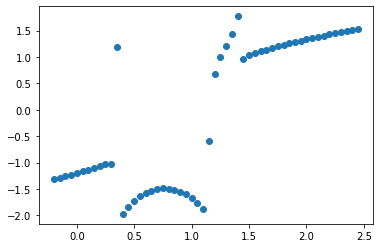

In [129]:
plt.scatter(I,V)

Here, we observe two straight lines for $I<0.33$ and $I>1.42$. These are the stable fixed points where the value of $V$ stabilises for a give $I$. These phases represent a scenario where the neurons are in "rest". At these transition points, the system exhibits hopf bifurcations and stable limit cycles appear/disappear in the $V-I$ phase space. It is in this unstable regime (with a stable limit cycle) where the neurons exhibit spiking dynamics.